In [355]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [356]:
from sklearn.datasets import make_classification

In [357]:
X,y = make_classification(n_samples=1000, n_features=2, n_classes=2,n_clusters_per_class=2,n_redundant=0)

In [358]:
X

array([[-0.93944938,  0.36837041],
       [-1.68259691,  0.78765926],
       [ 0.60827465,  0.88844047],
       ...,
       [ 1.14440255,  0.65280034],
       [-2.19989303,  1.06408311],
       [ 1.68817808, -2.4714237 ]])

In [359]:
y

array([1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0,

In [360]:
pd.DataFrame(X)[0]

0     -0.939449
1     -1.682597
2      0.608275
3     -1.290594
4      1.686489
         ...   
995   -0.795934
996    1.290823
997    1.144403
998   -2.199893
999    1.688178
Name: 0, Length: 1000, dtype: float64

<Axes: xlabel='0', ylabel='1'>

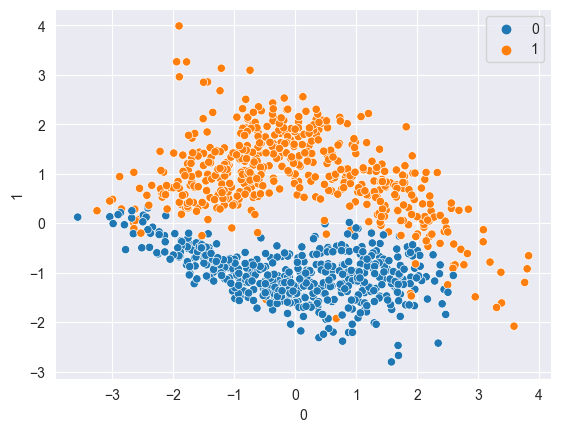

In [361]:
sns.scatterplot(x=pd.DataFrame(X)[0],y=pd.DataFrame(X)[1],hue=y)

In [362]:
from sklearn.model_selection import train_test_split

In [363]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25, random_state=10)

In [364]:
from sklearn.svm import SVC

In [365]:
classifier = SVC(kernel='linear')

In [366]:
classifier.fit(X_train,y_train)

SVC(kernel='linear')

In [367]:
y_train_pred = classifier.predict(X_train)

In [368]:
from sklearn.metrics import accuracy_score, classification_report

In [369]:
accuracy_score(y_train, y_train_pred)

0.9546666666666667

In [370]:
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       0.94      0.97      0.95       368
           1       0.97      0.94      0.95       382

    accuracy                           0.95       750
   macro avg       0.95      0.95      0.95       750
weighted avg       0.96      0.95      0.95       750



In [371]:
y_test_pred = classifier.predict(X_test)

In [372]:
accuracy_score(y_test,y_test_pred)

0.964

In [373]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96       127
           1       0.97      0.95      0.96       123

    accuracy                           0.96       250
   macro avg       0.96      0.96      0.96       250
weighted avg       0.96      0.96      0.96       250



In [374]:
from sklearn.model_selection import GridSearchCV

In [375]:
parameters = {
    'C' : [0.1,1,10,100,1000],
    'gamma' : [1,0.1,0.01,0.001],
    'kernel' : ['linear']
}

In [376]:
classifier = SVC()

In [377]:
clf = GridSearchCV(classifier, param_grid=parameters,cv=5,refit=True)

In [378]:
clf.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001], 'kernel': ['linear']})

In [379]:
clf.best_score_

0.9559999999999998

In [380]:
clf.best_params_

{'C': 0.1, 'gamma': 1, 'kernel': 'linear'}

In [381]:
classifier = SVC(C=1,kernel='linear',gamma=1)

In [382]:
classifier.fit(X_train,y_train)

SVC(C=1, gamma=1, kernel='linear')

In [383]:
y_pred_test = classifier.predict(X_test)

In [384]:
accuracy_score(y_test,y_pred_test)

0.964

In [385]:
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96       127
           1       0.97      0.95      0.96       123

    accuracy                           0.96       250
   macro avg       0.96      0.96      0.96       250
weighted avg       0.96      0.96      0.96       250

